In [1]:
import os
import sys

Setup path to bcanalyzer sources or install package from pip

In [2]:
# For work from repository
sys.path.append('../')
# OR, for work separatelly
#!pip install bio-cntrs-analyzer

In [3]:
import cv2 
from matplotlib import pyplot as plt 

from bcanalyzer.image_processing.image_processor import edge_density
from bcanalyzer.common.io import im_load


Load sample image from the HuTu80 dataset. 

Dataset was published in the article [Segmentation of patchy areas in biomedical images based on local edge density estimation](https://www.sciencedirect.com/science/article/pii/S1746809422006437).


In [4]:
# Load image in cv2 style (BGR)
img_np = im_load("./images/HuTu80_sample.png")

plt.figure(figsize=(12,15))
plt.axis('off')
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)) # Convert from BGR to RGB and show image
plt.show()

Convert color image to grayscale, because the algorithm requires a grayscale image for processing.

In [5]:
gray_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,15))
plt.axis('off')
plt.imshow(gray_np, cmap="gray")
plt.show()

Estimate edge density with windows size 100 and step 10 (default)

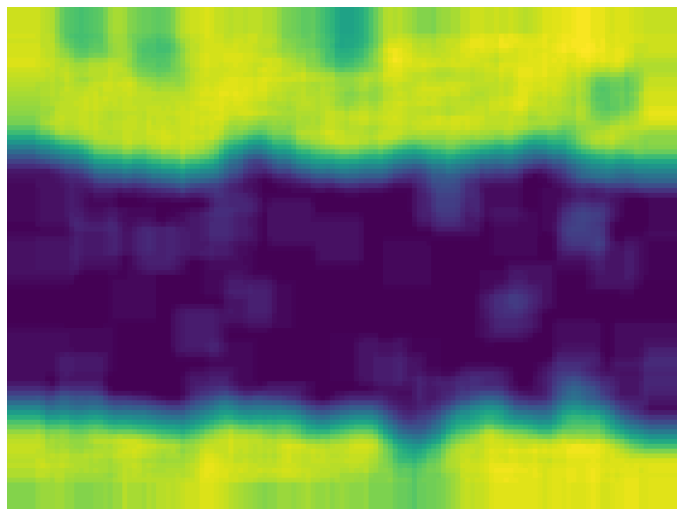

In [6]:
edges_np = edge_density(gray_np, 100)

plt.figure(figsize=(12,15))
plt.axis('off')
plt.imshow(edges_np)
plt.show()

Next, estimate density with different parameters

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=4, sharex=True,
                                    figsize=(16, 10))
for row in range(3):
    for col in range(4):
        step_size = col*3 + 1
        win_size = (row+1) * 30
        edges_np = edge_density(gray_np, win_size=win_size, win_step=step_size)
        axs[row, col].set_title(f'Win size: {win_size}, step: {step_size}')
        axs[row, col].imshow(edges_np)
        axs[row, col].axis('off')